<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/GrowthAccounting-py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e392c127e7ad>:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(


   year countrycode        rgdpna       rkna        pop        emp  \
0  1975         GBR  9.756079e+05  4805111.5  56.179925  24.826508   
1  1976         GBR  1.005152e+06  4929271.5  56.212943  24.698595   
2  1977         GBR  1.031256e+06  5045754.5  56.224944  24.738674   
3  1978         GBR  1.073847e+06  5171337.0  56.223974  24.874187   
4  1979         GBR  1.113323e+06  5303411.0  56.220089  25.099518   
5  1980         GBR  1.089172e+06  5402248.5  56.221513  24.953400   
6  1981         GBR  1.079948e+06  5467771.5  56.231020  24.112947   
7  1982         GBR  1.102361e+06  5549436.0  56.250124  23.701401   
8  1983         GBR  1.148680e+06  5644459.0  56.283959  23.651485   
9  1984         GBR  1.174645e+06  5767542.0  56.337848  24.172579   

           avh     labsh    rtfpna     alpha           y_n         hours  \
0  1899.763371  0.603153  0.693385  0.396847  39297.023438  47164.489710   
1  1891.976205  0.603153  0.707695  0.396847  40696.730469  46729.154137   
2

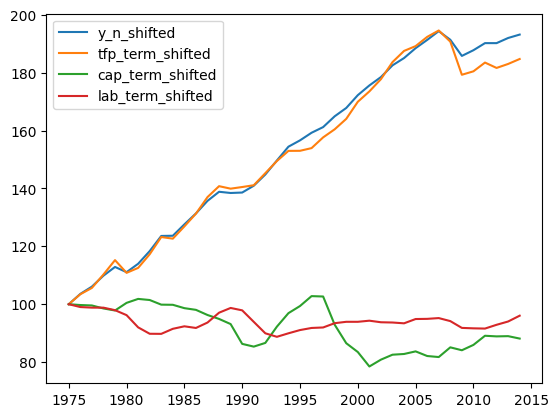

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
pwt90 = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt90.dta')

# Filter and select relevant columns
data = pwt90.loc[pwt90['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1975) & (data['year'] <= 2015)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.head(10))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()
